In [1]:
# importing data sets 
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person = 60)

In [2]:
# printing face names 
print(faces.target_names)

# printing images size
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [3]:
# importing matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

import numpy as np

%matplotlib inline 

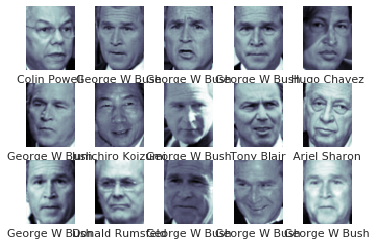

In [10]:
# plotting the faces 
fig ,ax = plt.subplots(3, 5)
# fig.subplots_adjust()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks = [], yticks = [], xlabel=faces.target_names[faces.target[i]])

In [11]:
# performing model computation 
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA # for feature reduction 
from sklearn.pipeline import make_pipeline # to make pipeline 

pca = RandomizedPCA(n_components = 150, whiten = True, random_state = 42)
svc = SVC(kernel='rbf', class_weight = 'balanced')

model = make_pipeline(pca, svc)

/home/sanidhya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
# train test split 
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(faces.data,faces.target, random_state = 42)

In [13]:
# making a gridsearchcv 
from sklearn.grid_search import GridSearchCV

param_grid = {
    'svc__C':[1,5,10,50],
    'svc__gamma':[0.0001, 0.0005 , 0.001, 0.005]
}

# making a grid 

grid =  GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)

print(grid.best_params_)

/home/sanidhya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/home/sanidhya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/home/sanidhya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_s

/home/sanidhya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/home/sanidhya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/home/sanidhya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_s

/home/sanidhya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/home/sanidhya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/home/sanidhya/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_s

CPU times: user 54.2 s, sys: 2.03 s, total: 56.2 s
Wall time: 14.8 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [15]:
model = grid.best_estimator_
%time yfit = model.predict(X_test)

CPU times: user 253 ms, sys: 32.1 ms, total: 285 ms
Wall time: 72.8 ms


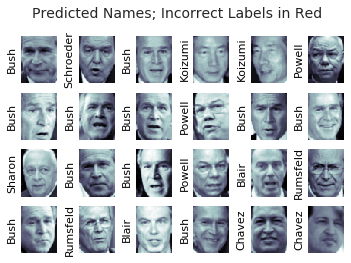

In [27]:
# plotting the fit result 
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks = [], yticks = [])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color = 'black' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size = 14);